<a href="https://colab.research.google.com/github/fahmipp/UAS14523/blob/main/UAS_DM_14523.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_excel("/content/E-commerce-Customer-Behavior-Sheet1.xlsx")

In [3]:
df

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied
...,...,...,...,...,...,...,...,...,...,...,...
345,446,Male,32,Miami,Silver,660.30,10,3.8,True,42,Unsatisfied
346,447,Female,36,Houston,Bronze,470.50,8,3.0,False,27,Neutral
347,448,Female,30,New York,Gold,1190.80,16,4.5,True,28,Satisfied
348,449,Male,34,Los Angeles,Silver,780.20,11,4.2,False,21,Neutral


In [4]:
#Mengatasi Nilai Null atau Kosong Yang Ada di Dalam Data

# Replace missing values with the mean for numerical columns
for col in df.select_dtypes(include=np.number):
    df[col] = df[col].fillna(df[col].mean())

# Replace missing values with the mode for categorical columns
for col in df.select_dtypes(include=['object']):
    df[col] = df[col].fillna(df[col].mode()[0])

In [21]:
# Encoding kategori yang ada pada dataset

# Encode categorical features using Label Encoding
label_encoders = {}
for column in df.select_dtypes(include=['object']):
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])
    # Explicitly convert the encoded column to numeric type
    df[column] = df[column].astype(int) # or df[column] = df[column].astype(float)

In [22]:
# Data setelah Encoding

df

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,0,29,4,1,1120.20,14,4.6,True,25,1
1,102,1,34,2,2,780.50,11,4.1,False,18,0
2,103,0,43,0,0,510.75,9,3.4,True,42,2
3,104,1,30,5,1,1480.30,19,4.7,False,12,1
4,105,1,27,3,2,720.40,13,4.0,True,55,2
...,...,...,...,...,...,...,...,...,...,...,...
345,446,1,32,3,2,660.30,10,3.8,True,42,2
346,447,0,36,1,0,470.50,8,3.0,False,27,0
347,448,0,30,4,1,1190.80,16,4.5,True,28,1
348,449,1,34,2,2,780.20,11,4.2,False,21,0


In [23]:
X = df.drop(columns=['Customer ID', 'Satisfaction Level'])
y = df['Satisfaction Level']

In [24]:
# Normalisasi fitur numerik menggunakan StandardScaler
numerical_cols = X.select_dtypes(include=np.number).columns
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Data setelah normalisasi
print(X.head())

   Gender       Age      City  Membership Type  Total Spend  Items Purchased  \
0    -1.0 -0.945152  0.878073        -0.003502     0.760130         0.337346   
1     1.0  0.082826 -0.294925         1.222126    -0.179459        -0.385538   
2    -1.0  1.933185 -1.467924        -1.229130    -0.925570        -0.867461   
3     1.0 -0.739557  1.464572        -0.003502     1.756144         1.542153   
4     1.0 -1.356343  0.291574         1.222126    -0.345692         0.096385   

   Average Rating  Discount Applied  Days Since Last Purchase  
0        1.001981              True                 -0.118359  
1        0.139479             False                 -0.639907  
2       -1.068024              True                  1.148256  
3        1.174482             False                 -1.086947  
4       -0.033022              True                  2.116844  


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Membuat model K-NN dengan k=10
knn = KNeighborsClassifier(n_neighbors=10)

In [29]:
# Melatih model K-NN
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [33]:
# Prediksi Pada Data Uji
y_pred = knn.predict(X_test)

In [30]:
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [31]:
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[23  0  0]
 [ 0 29  0]
 [ 0  0 18]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        29
           2       1.00      1.00      1.00        18

    accuracy                           1.00        70
   macro avg       1.00      1.00      1.00        70
weighted avg       1.00      1.00      1.00        70



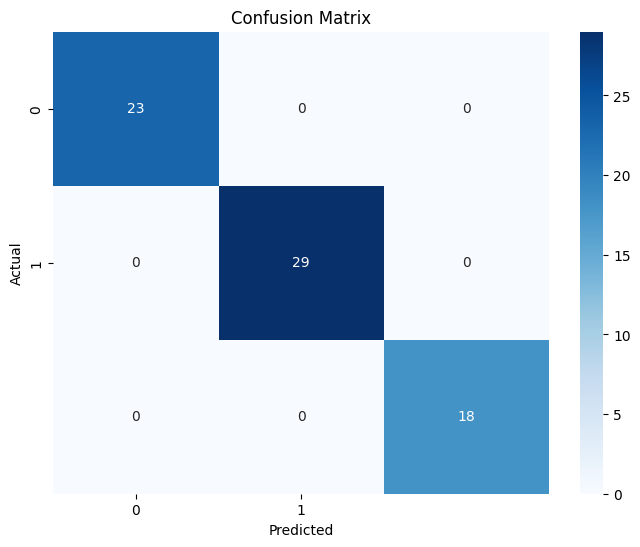

In [39]:
# Asumsikan 'Satisfaction Level' mempunyai 0 dan 1 sebagai class
class_names = [0, 1]

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()